<a href="https://colab.research.google.com/github/maxstclair/kmc/blob/main/KMC_Assignment_MaxStClair.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#! git clone https://www.github.com/DS3001/kmc

Cloning into 'kmc'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 25 (delta 4), reused 3 (delta 3), pack-reused 18
Receiving objects: 100% (25/25), 5.04 MiB | 18.51 MiB/s, done.
Resolving deltas: 100% (4/4), done.


## Question 2
This is a question about k means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking k.

1. Run the code below, which creates four datasets: df0_125, df0_25, df0_5, df1_0, and df2_0. Each data set is created by increasing the amount of noise (standard deviation) around the cluster centers, from 0.125 to 0.25 to 0.5 to 1.0 to 2.0.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans # Import kmc
import matplotlib.pyplot as plt

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

2. Make scatterplots of the (x1, x2) points by group for each of the datasets. As the noise goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?

<Axes: xlabel='x1', ylabel='x2'>

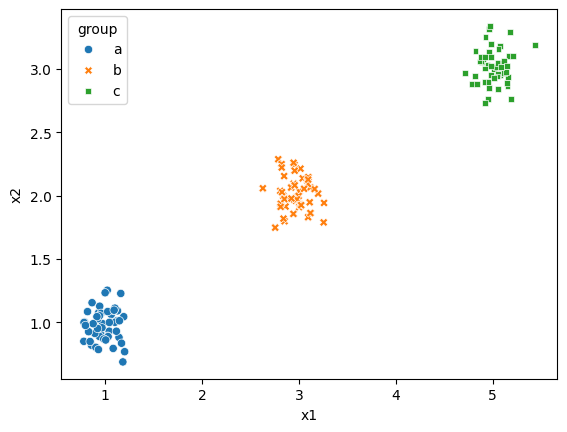

In [ ]:
sns.scatterplot(data = df0_125, x = 'x1',y='x2',style='group',hue='group')

<Axes: xlabel='x1', ylabel='x2'>

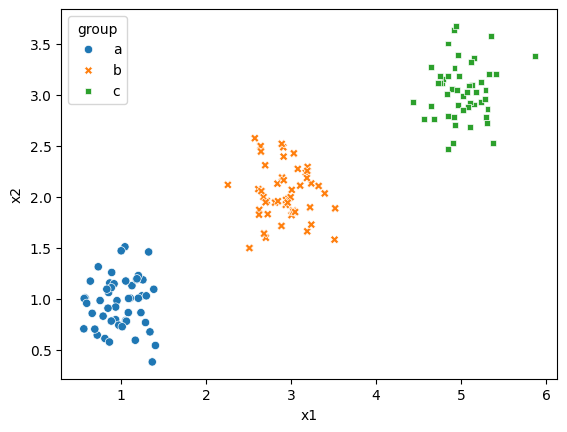

In [ ]:
sns.scatterplot(data = df0_25, x = 'x1',y='x2',style='group',hue='group')

<Axes: xlabel='x1', ylabel='x2'>

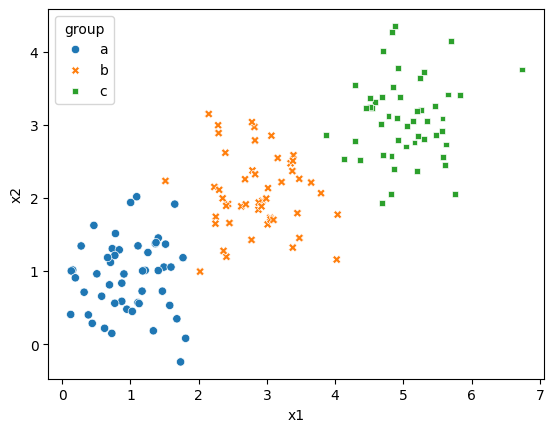

In [ ]:
sns.scatterplot(data = df0_5, x = 'x1',y='x2',style='group',hue='group')

<Axes: xlabel='x1', ylabel='x2'>

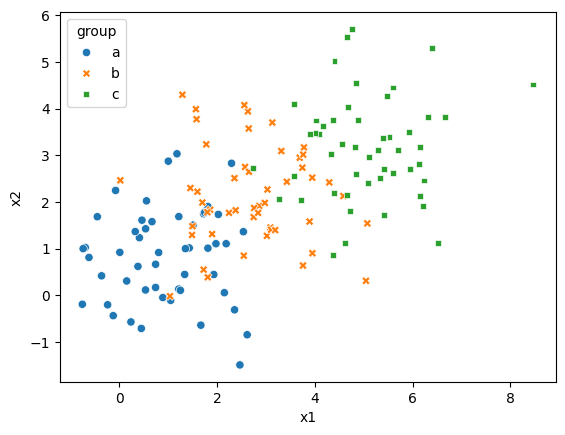

In [ ]:
sns.scatterplot(data = df1_0, x = 'x1',y='x2',style='group',hue='group')

<Axes: xlabel='x1', ylabel='x2'>

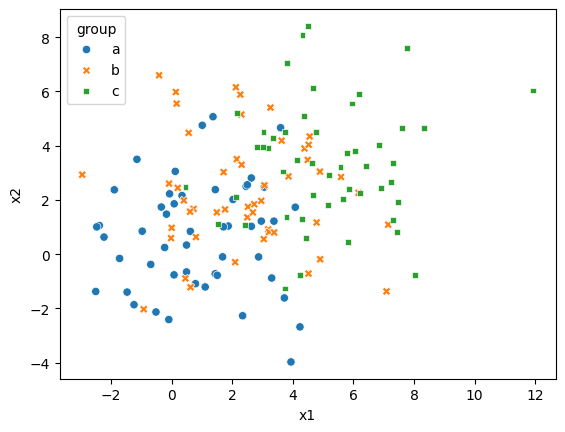

In [ ]:
sns.scatterplot(data = df2_0, x = 'x1',y='x2',style='group',hue='group')

The clusters are visually distinct 0.125, and become less so as the noise increases. For noise of 0.5 and above, it's hard to tell which cluster each point should belong to.

3. Create a scree plot for each of the datasets. Describe how the level of noise affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a k.

In [ ]:
# scaler function
def maxmin(x):
   x = (x-min(x))/(max(x)-min(x))
   return x

# function to make scree plots
def scree(data):
  # normalize data
  X = data.loc[ : , ['x1','x2'] ]
  X = X.apply(maxmin)
  # set range of k
  k_bar = 15
  k_grid = np.arange(1,k_bar+1)

  SSE = np.zeros(k_bar) # model error
  # loop through k's
  for k in range(k_bar):
    # fit the model
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X)
    # record SSE
    SSE[k] = model.inertia_
  # plot
  scree_plot, axes = plt.subplots()
  sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')
  axes.set_ylim(0, 35)

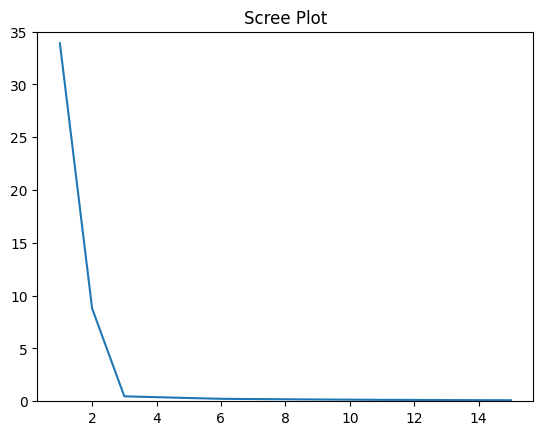

In [ ]:
scree(data = df0_125)

Definitive elbow at k=3

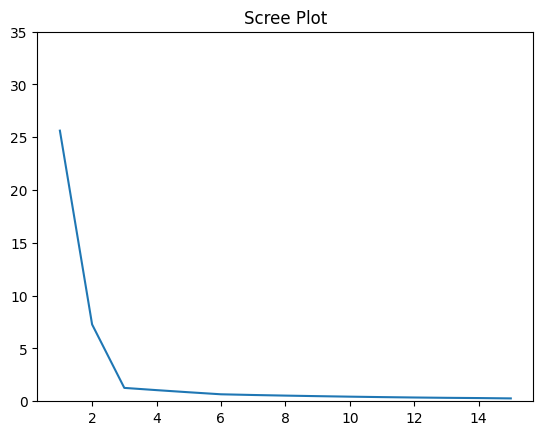

In [ ]:
scree(data = df0_25)

Definitive elbow at k=3

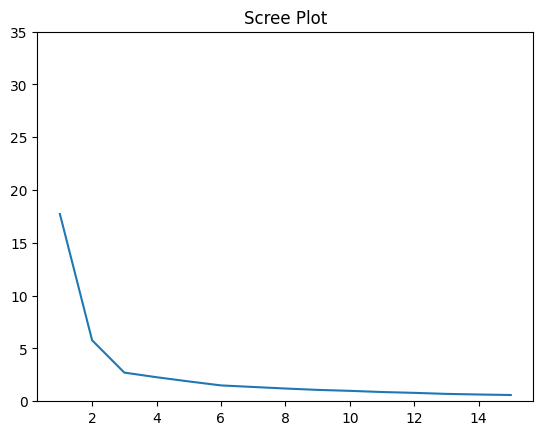

In [ ]:
scree(data = df0_5)

Maybe an elbow at k=3?

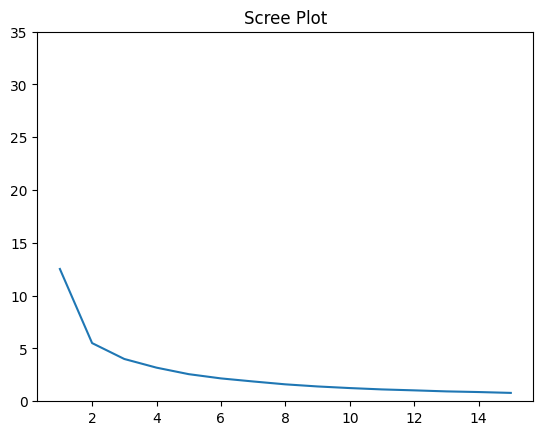

In [ ]:
scree(data = df1_0)

No clear elbow

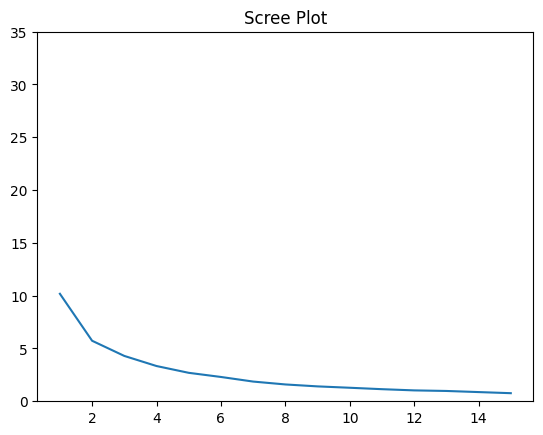

In [ ]:
scree(data = df2_0)

No clear elbow

4. Explain the intuition of the elbow, using this numerical simulation as an example.


The scree plot visually shows the marginal benefit of adding an additional cluster. With data that groups well, like the examples with lower noise, there is a large benefit, in terms of reducing SSE, of adding clusters up to the point where the number of clusters equals the number of groups that exist in the data. Then, additional groups do little to reduce the error. Therefore, the slope of the scree plot switches from steeply negative to near flat, hence the "elbow".

# Question 3

We looked at computer vision with kNN in a previous question. Can k means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:

In [ ]:
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test

11490434/11490434 [==============================] - 0s 0us/step


The y_test and y_train vectors, for each index i, tell you want number is written in the corresponding index in X_train[i] and X_test[i]. The value of X_train[i] and X_test[i], however, is a 28
28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:

7 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 198 198 198 19

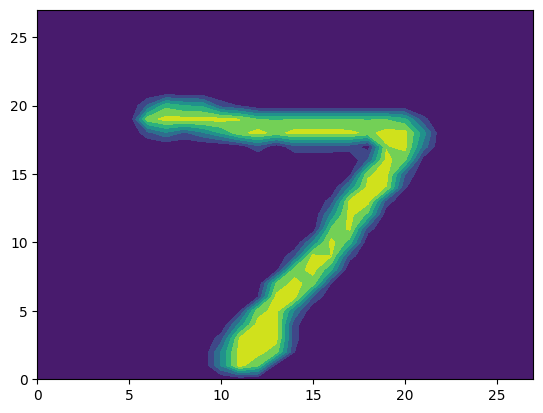

2 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 253 253  65   

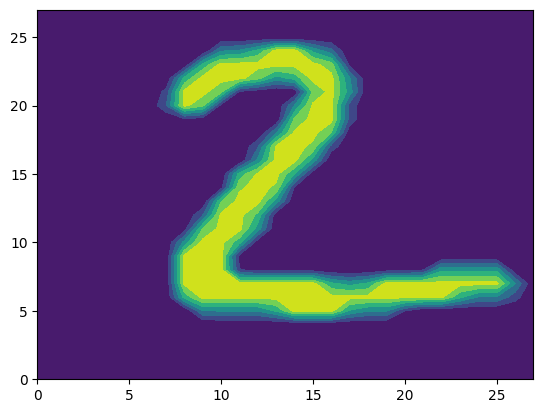

1 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 254 109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  87 252  82   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 135 241   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 244 150   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  84 254  63   

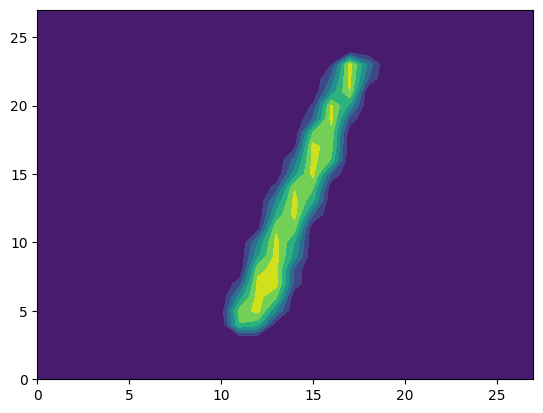

0 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  11 150 253 202  31   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  37 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  21 197 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 110 190 251 251 251 253 169 109  62   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 253 251 251 251 251 253 251 251 22

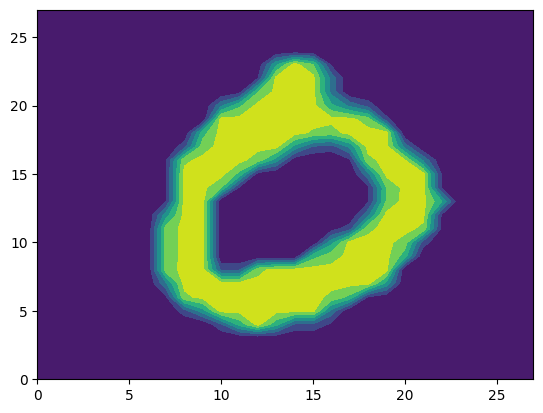

4 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  50 224   0   0   0   0   0   0   0  70  29   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 121 231   0   0   0   0   0   0   0 148 168   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4 195 231   0   0   0   0   0   0   0  96 210  11   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  69 252 134   0   0   0   0   0   0   

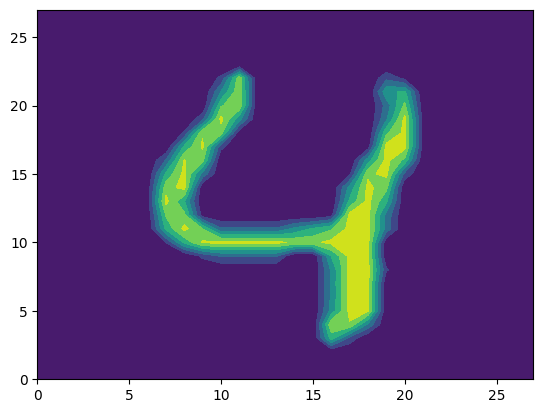

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()

2. What is the shape of X_train and X_test? What is the shape of X_train[i] and X_test[i] for each index i? What is the shape of y_train and y_test?

In [ ]:
print(X_train.shape)
print(X_test.shape)
for i in range(5):
  print(X_train[i].shape)
  print(X_test[i].shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(60000,)
(10000,)


3. Use Numpy's .reshape() method to covert the training and testing data from a matrix into an vector of features. So, X_test[index].reshape((1,784)) will convert the *index*-th element of X_test into a 784-length row vector of values, rather than a matrix. Turn X_train into an n X 784 matrix X that is suitable for scikit-learn's kNN classifier where N is the number of observations and 784 = 28 x 28 (you could use, for example, a for loop).

In [ ]:
Z_train = []
for i in range(60000): # Y train has 60000 values
  row = X_train[i].reshape((1,784)) # Reshape
  Z_train.append(row[0]) # Add back to the list
Z_train = pd.DataFrame(Z_train)
Z_train.to_csv('./sample_data/Z_train.csv')
Z_test = []
for i in range(10000): # Y test has 10000 values
  row = X_test[i].reshape((1,784))
  Z_test.append(row[0])
Z_test = pd.DataFrame(Z_test)
Z_test.to_csv('./sample_data/Z_train.csv')

4. Use k means clustering on the reshaped X_test data with k=10.

In [ ]:
# Scaler
def maxmin(x):
  if np.sum(x)==0:
    return x
  else:
    u = (x-min(x))/(max(x)-min(x))
    return u
# KMC
from sklearn.cluster import KMeans
U_train = Z_train.apply(maxmin)
U_test = Z_test.apply(maxmin)
model = KMeans(n_clusters=10, n_init=20).fit(U_train)

5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can kMC recover the latent digits 0 to 9, without even knowing what those digits were?

In [ ]:
y_hat = model.predict(U_test)
pd.crosstab(y_test,y_hat)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,30,4,2,5,48,447,3,423,0,18
1,2,0,1,469,2,0,0,0,660,1
2,25,30,709,84,65,3,11,19,59,27
3,7,15,40,7,696,1,7,18,73,146
4,35,559,5,36,0,1,310,1,30,5
5,19,56,4,105,287,9,70,39,23,280
6,794,22,18,30,2,20,1,24,28,19
7,1,292,13,57,0,1,603,1,59,1
8,10,34,6,44,209,6,35,11,34,585


0: Cluster 5 or 7

1: Cluster 3 or 8

2: Cluster 2

3: Cluster 4

4: Cluster 1 or 6

5: Cluster 4 or 9

6: Cluster 0

7: Cluster 6

8: Cluster 9

9: Cluster 1 or 6

It seems to do a fairly good job for some numbers, and mixes up some visually similar one's. 3 and 8, 5 and 7, and 4 and 9 are all fairly similar looking. It does do a fairly good job given that it isn't given the digits to begin with.

6. If you use a scree plot to determine the number of clusters k, does it pick 10 (the true number of digits), or not? If it fails to pick k=10, which digits does it tend to combine into the same classification?

Text(0.5, 1.0, 'Scree Plot')

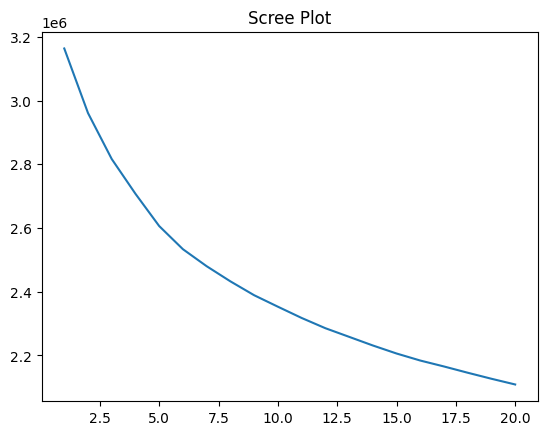

In [ ]:
k_bar = 20
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(U_train) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector
sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot

The scree plot is fairly smooth/does not have a clear elbow. If I were to guess the optimal k I would say 5 or 6, does not clearly suggest 10. In the previous question, we saw that it tended to combine 1 and 6, 3 and 8, 5 and 7, and 4 and 9.